In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('preci_all.csv')
df.columns = ['Date','ddate','value','geo']
df['Date'] = df['Date'].astype(str).str[:-2].astype(str)
df.columns

Index(['Date', 'ddate', 'value', 'geo'], dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d%H%M')
del df['ddate'],df['geo']
df

,Date,value
0,2000-06-01 00:00:00,0.0
1,2000-06-01 00:30:00,0.0
2,2000-06-01 01:00:00,0.0
3,2000-06-01 01:30:00,0.0
4,2000-06-01 02:00:00,0.0
...,...,...
355008,2020-08-31 08:00:00,0.0
355009,2020-08-31 08:30:00,0.0
355010,2020-08-31 09:00:00,0.0
355011,2020-08-31 09:30:00,0.0


In [25]:
df19 = df[(df.Date.dt.year == 2019) & ((df.Date.dt.month == 6) | (df.Date.dt.month == 7) | (df.Date.dt.month == 8) )]
df20 = df[(df.Date.dt.year == 2020) & ((df.Date.dt.month == 6) | (df.Date.dt.month == 7) | (df.Date.dt.month == 8) )]
df19

,Date,value
333072,2019-06-01 00:00:00,0.000000
333073,2019-06-01 00:30:00,0.000000
333074,2019-06-01 01:00:00,0.000000
333075,2019-06-01 01:30:00,0.000000
333076,2019-06-01 02:00:00,0.000000
...,...,...
337483,2019-08-31 21:30:00,0.253514
337484,2019-08-31 22:00:00,0.147691
337485,2019-08-31 22:30:00,0.111181
337486,2019-08-31 23:00:00,0.077543


In [32]:
x = np.asarray(df19['value'])
x = x.reshape(-1,1)

In [59]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(x)
        bic.append(gmm.bic(x))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm19 = gmm

In [60]:
best_gmm19.get_params

<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='diag', n_components=6)>

<AxesSubplot:ylabel='Density'>

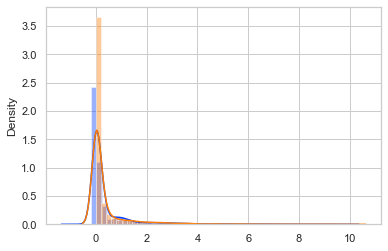

In [71]:
x_sam,_ = best_gmm19.sample(4416)
sns.distplot(x_sam,bins=50)
sns.distplot(x,bins=50)

<AxesSubplot:ylabel='Density'>

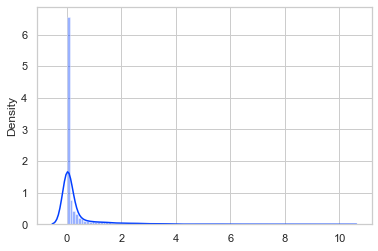

In [63]:
x = np.asarray(df20['value'])
x = x.reshape(-1,1)

In [64]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(x)
        bic.append(gmm.bic(x))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm20 = gmm

In [65]:
best_gmm20.get_params

<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='spherical', n_components=6)>

<AxesSubplot:ylabel='Density'>

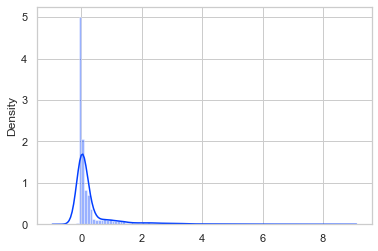

In [66]:
x_sam,_ = best_gmm20.sample(4416)
sns.distplot(x_sam,bins=100)

<AxesSubplot:ylabel='Density'>

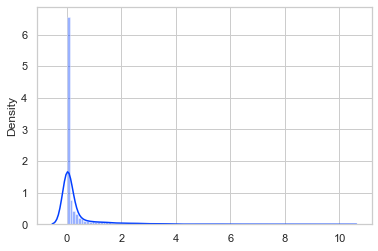

In [67]:
sns.distplot(x,bins=100)

In [69]:
best_gmm19.means_ - best_gmm20.means_

array([[-0.02071954],
       [-2.21182806],
       [ 1.59168808],
       [-0.00409227],
       [ 0.81749019],
       [-0.14501687]])